# Analistes del Perfil del Client: 
#### Quins són els perfils demogràfics que mostren més propensió a contractar productes financers?

#### LIBRERIAS

In [281]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing.parquet')
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11163 non-null  int64  
 1   age            11163 non-null  float64
 2   job            11163 non-null  object 
 3   marital        11163 non-null  object 
 4   education      11163 non-null  object 
 5   is_in_default  11163 non-null  int64  
 6   balance        11163 non-null  int64  
 7   housing        11163 non-null  int64  
 8   loan           11163 non-null  int64  
 9   contact        11163 non-null  object 
 10  day            11163 non-null  int64  
 11  month          11163 non-null  object 
 12  duration       11163 non-null  int64  
 13  campaign       11163 non-null  int64  
 14  pdays          11163 non-null  int64  
 15  previous       11163 non-null  int64  
 16  poutcome       11163 non-null  object 
 17  deposit        11163 non-null  int64  
dtypes: flo

In [283]:
cliente= df_BANK_marketing[['id', 'age', 'job', 'marital', 'education', 'is_in_default', 'housing', 'loan', 'deposit']]
cliente

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
2,3,56.0,admin.,married,secondary,0,0,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
...,...,...,...,...,...,...,...,...,...
11158,11159,33.0,blue-collar,single,primary,0,1,0,0
11159,11160,39.0,services,married,secondary,0,0,0,0
11160,11161,32.0,technician,single,secondary,0,0,0,0
11161,11162,43.0,technician,married,secondary,0,0,1,0


In [284]:
cliente.to_csv(r'c:\Users\34622\Documents\0_Simulacio_projecte\cliente_sprint1.csv')

In [285]:
cliente[cliente['is_in_default'] == 1]
## existen 168 clientes con creditos en demora

,id,age,job,marital,education,is_in_default,housing,loan,deposit
31,32,32.0,blue-collar,married,secondary,1,1,0,1
115,116,30.0,blue-collar,single,secondary,1,1,0,1
211,212,42.0,technician,single,secondary,1,1,0,1
214,215,44.0,management,divorced,tertiary,1,1,0,1
217,218,40.0,self-employed,married,secondary,1,1,1,1
...,...,...,...,...,...,...,...,...,...
11024,11025,37.0,self-employed,married,secondary,1,1,0,0
11054,11055,34.0,management,single,tertiary,1,0,0,0
11071,11072,31.0,management,single,tertiary,1,1,0,0
11127,11128,35.0,unemployed,married,secondary,1,1,1,0


##### HIPOTECA

In [286]:
hipoteca = cliente[cliente['housing'] == 1]
hipoteca
## existen 5282 clientes que tienen una hipóteca

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
6,7,42.0,management,single,tertiary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
11153,11154,34.0,housemaid,married,secondary,0,1,0,0
11155,11156,52.0,technician,married,tertiary,0,1,1,0
11156,11157,35.0,blue-collar,married,secondary,0,1,1,0
11157,11158,34.0,blue-collar,single,secondary,0,1,0,0


##### CREDITO

In [287]:
credito = cliente[cliente['loan'] == 1]
credito
## existen 1460 clinetes con un crédito personal

,id,age,job,marital,education,is_in_default,housing,loan,deposit
6,7,42.0,management,single,tertiary,0,1,1,1
7,8,56.0,management,married,tertiary,0,1,1,1
13,14,29.0,management,married,tertiary,0,1,1,1
20,21,49.0,admin.,divorced,secondary,0,1,1,1
41,42,60.0,blue-collar,married,primary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
11144,11145,38.0,unemployed,divorced,secondary,0,1,1,0
11147,11148,30.0,admin.,married,secondary,1,0,1,0
11155,11156,52.0,technician,married,tertiary,0,1,1,0
11156,11157,35.0,blue-collar,married,secondary,0,1,1,0


##### DEPOSITO

In [288]:
deposito = cliente[cliente['deposit'] == 1]
deposito

,id,age,job,marital,education,is_in_default,housing,loan,deposit
0,1,59.0,admin.,married,secondary,0,1,0,1
1,2,59.0,admin.,married,secondary,0,1,0,1
2,3,56.0,admin.,married,secondary,0,0,0,1
3,4,41.0,technician,married,secondary,0,1,0,1
4,5,55.0,services,married,secondary,0,1,0,1
...,...,...,...,...,...,...,...,...,...
5285,5286,78.0,retired,divorced,primary,0,0,0,1
5286,5287,30.0,management,single,tertiary,0,0,0,1
5287,5288,69.0,retired,divorced,tertiary,0,0,0,1
5288,5289,48.0,entrepreneur,married,secondary,0,0,1,1


##### DEMORA + TODO CONTRATADO

In [289]:
clientes_1 = cliente[(cliente['is_in_default'] == 1)&(cliente['housing'] == 1) & (cliente['loan'] == 1)&(cliente['deposit'] == 1)]
clientes_1
## tenemos 7 clientes con contratados todos los sevicios y con inpagos

,id,age,job,marital,education,is_in_default,housing,loan,deposit
217,218,40.0,self-employed,married,secondary,1,1,1,1
381,382,41.0,blue-collar,single,secondary,1,1,1,1
409,410,38.0,management,married,tertiary,1,1,1,1
1556,1557,45.0,blue-collar,married,primary,1,1,1,1
1848,1849,45.0,admin.,married,secondary,1,1,1,1
4598,4599,33.0,blue-collar,divorced,unknown,1,1,1,1
4660,4661,31.0,entrepreneur,single,tertiary,1,1,1,1


##### NADA CONTRATADO

In [290]:
clientes_nada_contratado = cliente[(cliente['is_in_default'] == 0)&(cliente['housing'] == 0) & (cliente['loan'] == 0)&(cliente['deposit']==0)]
clientes_nada_contratado
## tenemos 2089 clientes sin nada contratado

,id,age,job,marital,education,is_in_default,housing,loan,deposit
5290,5291,57.0,retired,single,primary,0,0,0,0
5294,5295,37.0,entrepreneur,married,tertiary,0,0,0,0
5295,5296,32.0,management,married,tertiary,0,0,0,0
5296,5297,35.0,self-employed,married,secondary,0,0,0,0
5299,5300,52.0,unemployed,married,secondary,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11151,11152,34.0,management,married,secondary,0,0,0,0
11154,11155,43.0,admin.,single,secondary,0,0,0,0
11159,11160,39.0,services,married,secondary,0,0,0,0
11160,11161,32.0,technician,single,secondary,0,0,0,0


#### TODO CONTRATADO CON O SIN DEMORA

In [291]:
clientes_todo_contratado = cliente[(cliente['housing'] == 1) & (cliente['loan'] == 1)&(cliente['deposit'] ==1)]
clientes_todo_contratado
# tenemos 265 clientes que tienen contratado housing, loan y deposit

,id,age,job,marital,education,is_in_default,housing,loan,deposit
6,7,42.0,management,single,tertiary,0,1,1,1
7,8,56.0,management,married,tertiary,0,1,1,1
13,14,29.0,management,married,tertiary,0,1,1,1
20,21,49.0,admin.,divorced,secondary,0,1,1,1
41,42,60.0,blue-collar,married,primary,0,1,1,1
...,...,...,...,...,...,...,...,...,...
5224,5225,51.0,self-employed,married,tertiary,0,1,1,1
5238,5239,24.0,blue-collar,married,secondary,0,1,1,1
5240,5241,39.0,services,married,secondary,0,1,1,1
5254,5255,31.0,blue-collar,married,primary,0,1,1,1


In [292]:
clientes_todo_contratado.sort_values('is_in_default', ascending=False).head(10)

,id,age,job,marital,education,is_in_default,housing,loan,deposit
409,410,38.0,management,married,tertiary,1,1,1,1
4660,4661,31.0,entrepreneur,single,tertiary,1,1,1,1
381,382,41.0,blue-collar,single,secondary,1,1,1,1
1556,1557,45.0,blue-collar,married,primary,1,1,1,1
4598,4599,33.0,blue-collar,divorced,unknown,1,1,1,1
217,218,40.0,self-employed,married,secondary,1,1,1,1
1848,1849,45.0,admin.,married,secondary,1,1,1,1
2333,2334,32.0,services,married,secondary,0,1,1,1
2417,2418,52.0,admin.,married,secondary,0,1,1,1
2385,2386,32.0,admin.,married,secondary,0,1,1,1


## PERFIL CLIENTES CON HIPOTECA

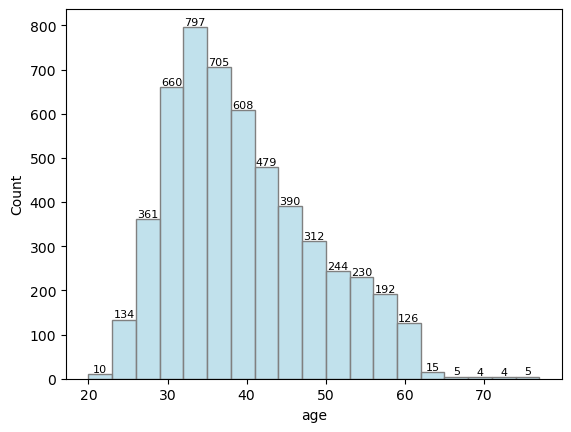

In [293]:
ax =sns.histplot(data=hipoteca, x='age', bins = range(20,80,3), color='lightblue', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [294]:
hipoteca_cuenteo = hipoteca['job'].value_counts()
order = hipoteca_cuenteo.index

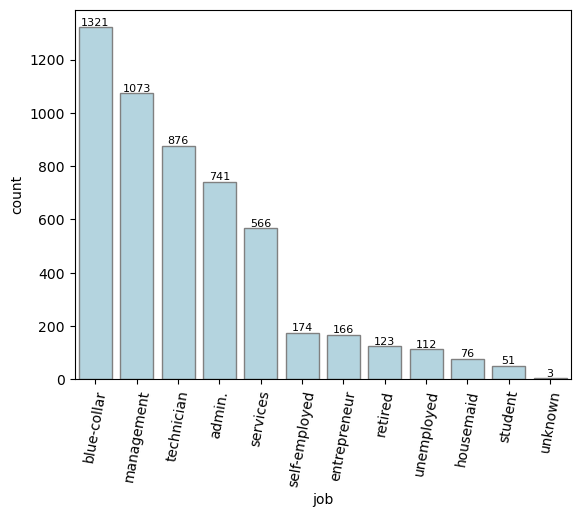

In [295]:
ax =sns.countplot(data=hipoteca, x='job', order = order, color='lightblue', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(rotation = 80);

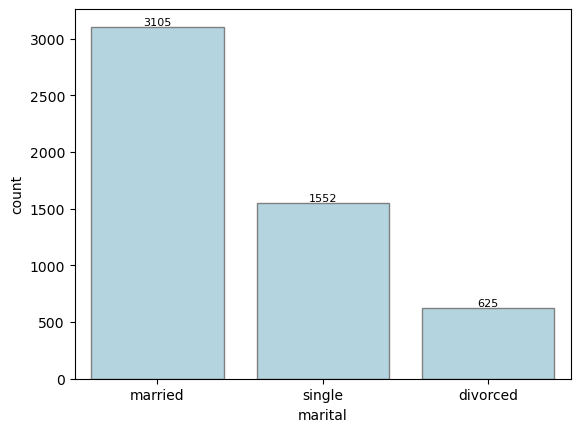

In [296]:
ax =sns.countplot(data=hipoteca, x='marital', color='lightblue', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [342]:
estado_civil = hipoteca.groupby(['marital']).housing.count().reset_index()
estado_civil

,marital,housing
0,divorced,625
1,married,3105
2,single,1552


In [361]:
colores = ['skyblue', 'lightgreen', 'pink']

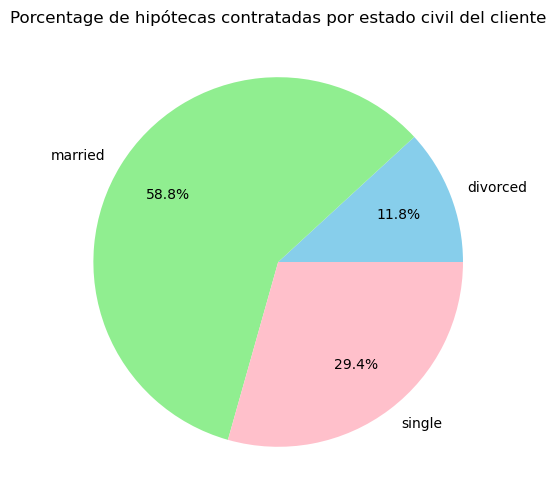

In [362]:
plt.figure(figsize=(6,6))
plt.pie(estado_civil['housing'], labels = estado_civil['marital'], autopct = "%.1f%%", pctdistance=0.7, colors = colores)
plt.title('Porcentage de hipótecas contratadas por estado civil del cliente')
plt.show()

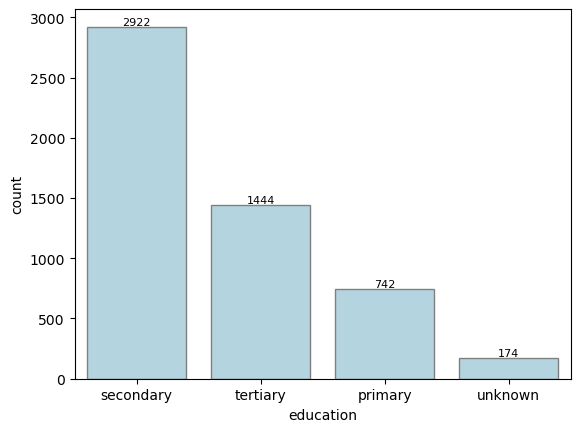

In [297]:
ax =sns.countplot(data=hipoteca, x='education', color='lightblue', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

## PERFIL CLIENTES CON TODO CONTRATADO

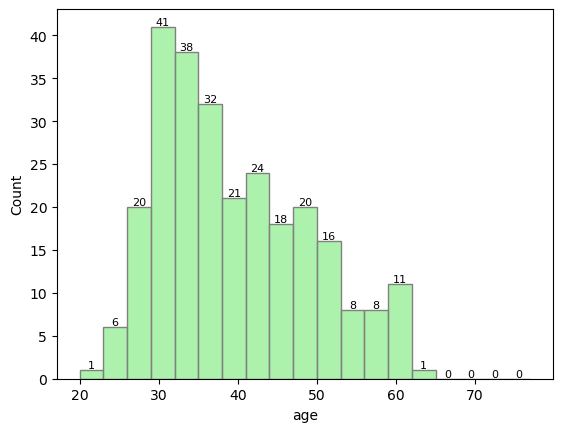

In [298]:
ax =sns.histplot(data=clientes_todo_contratado, x='age', bins = range(20,80,3), color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [299]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['job'].value_counts()
order = clientes_todo_contratado_cuenteo.index

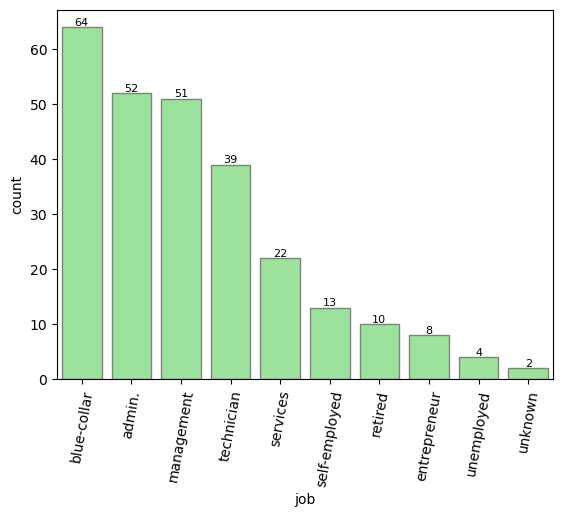

In [300]:
ax =sns.countplot(data=clientes_todo_contratado, x='job', order=order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(rotation = 80);

In [301]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['marital'].value_counts()
order = clientes_todo_contratado_cuenteo.index

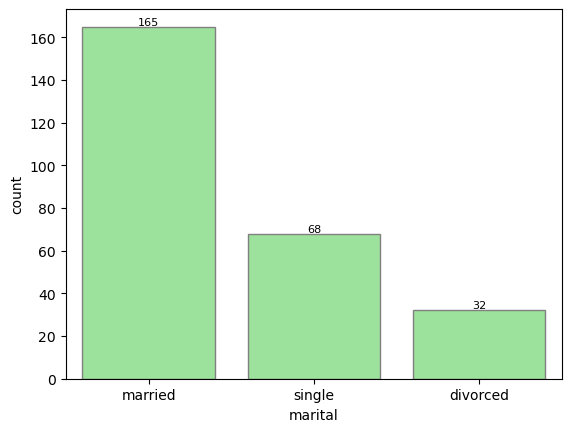

In [302]:
ax =sns.countplot(data=clientes_todo_contratado, x='marital', order = order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [303]:
clientes_todo_contratado_cuenteo = clientes_todo_contratado['education'].value_counts()
order = clientes_todo_contratado_cuenteo.index

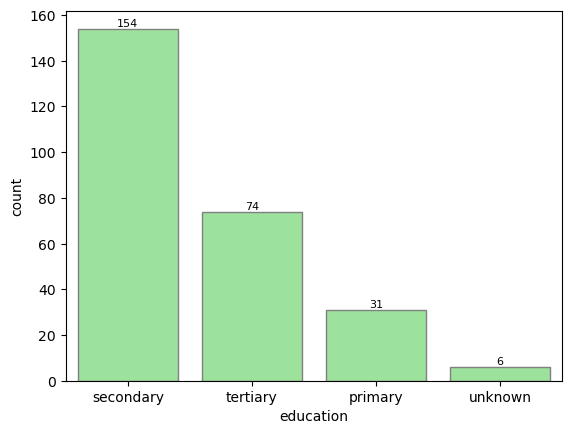

In [304]:
ax =sns.countplot(data=clientes_todo_contratado, x='education', order = order, color='lightgreen', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

## PERFIL CLIENTES CON CREDITO PERSONAL (LOAN)

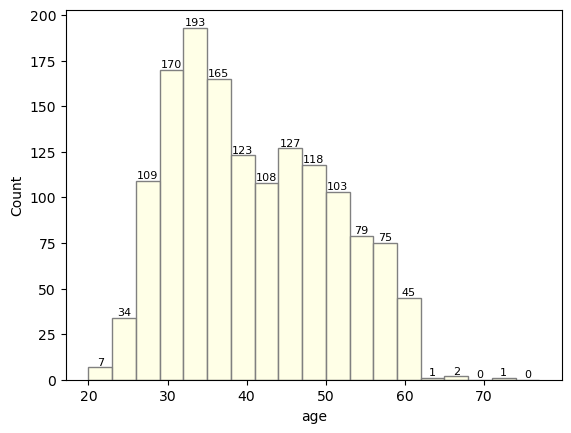

In [305]:
ax =sns.histplot(data=credito, x='age', bins = range(20,80,3), color='LIGHTYELLOW', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [306]:
credito_cuenteo = credito['job'].value_counts()
order = credito_cuenteo.index

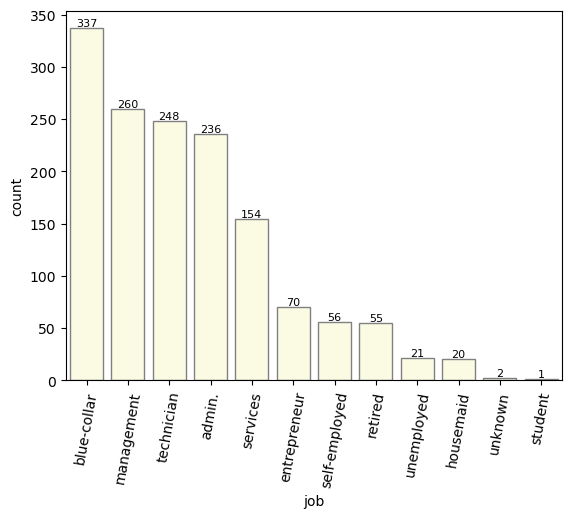

In [307]:
ax =sns.countplot(data=credito, x='job', order=order, color='lightYELLOW', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(rotation = 80);

In [308]:
credito_cuenteo = credito['marital'].value_counts()
order = credito_cuenteo.index

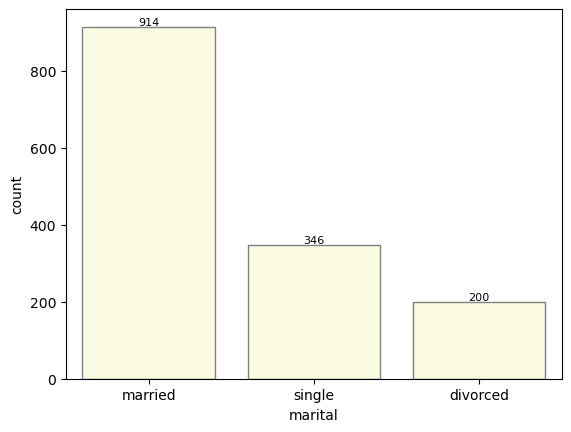

In [309]:
ax =sns.countplot(data=credito, x='marital', order = order, color='lightyellow', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [310]:
credito_cuenteo = credito['education'].value_counts()
order = credito_cuenteo.index

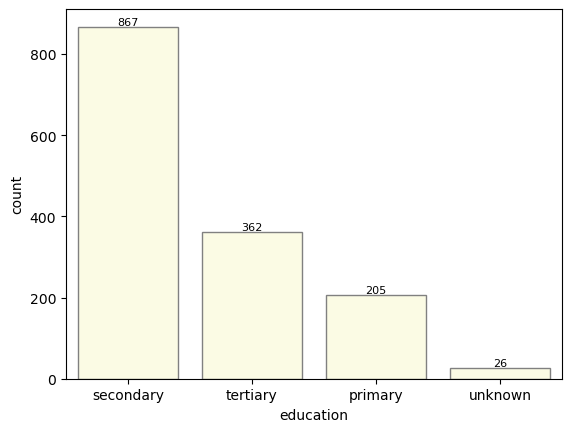

In [311]:
ax =sns.countplot(data=credito, x='education', order=order, color='lightyellow', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

## PERFIL CLIENTES CON DEPOSITO

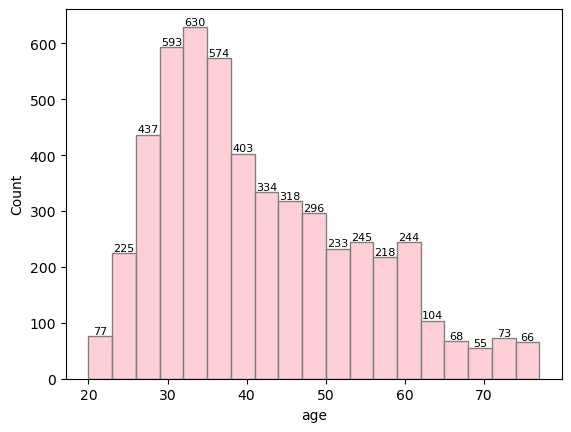

In [312]:
ax =sns.histplot(data=deposito, x='age', bins = range(20,80,3), color='pink', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [313]:
deposito_cuenteo = deposito['job'].value_counts()
order = deposito_cuenteo.index

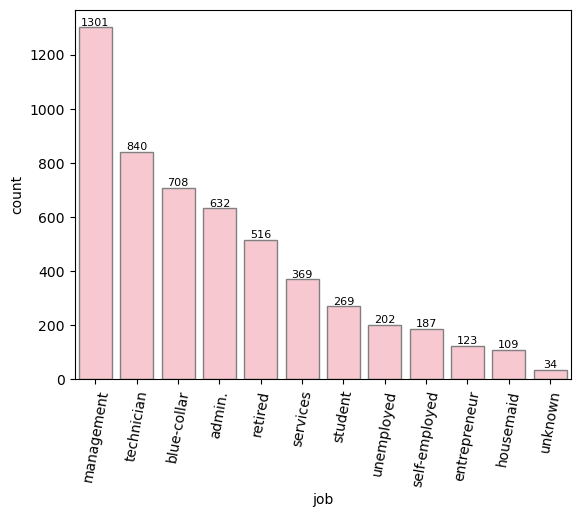

In [314]:
ax =sns.countplot(data=deposito, x='job', order=order, color='pink', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8)
plt.xticks(rotation = 80);

In [315]:
deposito_cuenteo = deposito['marital'].value_counts()
order = deposito_cuenteo.index

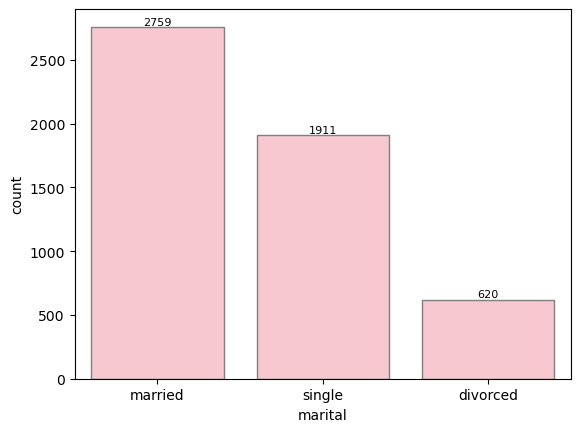

In [316]:
ax =sns.countplot(data=deposito, x='marital', order = order, color='pink', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

In [317]:
deposito_cuenteo = deposito['education'].value_counts()
order = deposito_cuenteo.index

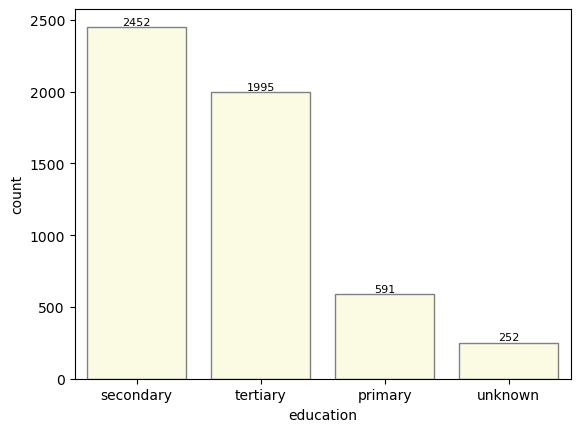

In [318]:
ax =sns.countplot(data=deposito, x='education', order=order, color='lightyellow', edgecolor = 'gray')
ax.bar_label(ax.containers[0], fontsize = 8);

#### VISUALIZACION JUNTO

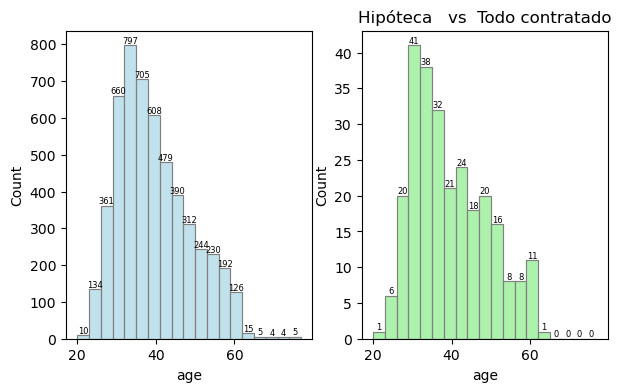

In [328]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 4))
sns.histplot(data=hipoteca, x='age', ax=ax1, bins = range(20,80,3), color='lightblue', edgecolor = 'gray')
ax1.bar_label(ax1.containers[0], fontsize = 6)
sns.histplot(data=clientes_todo_contratado, x='age', ax=ax2, bins = range(20,80,3), color='lightgreen', edgecolor = 'gray')
ax2.bar_label(ax2.containers[0], fontsize = 6)
plt.title('Hipóteca   vs  Todo contratado');

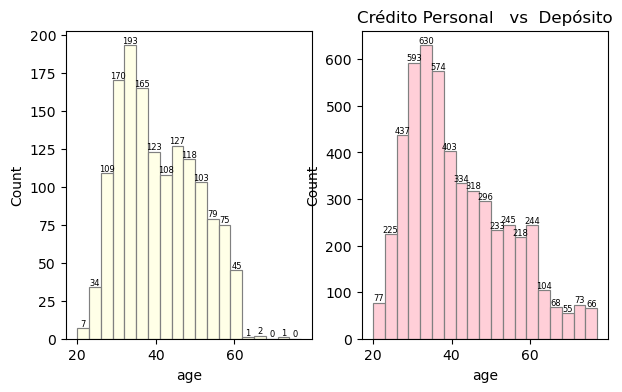

In [320]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 4))
sns.histplot(data=credito, x='age', ax=ax1, bins = range(20,80,3), color='lightyellow', edgecolor = 'gray')
ax1.bar_label(ax1.containers[0], fontsize = 6)

sns.histplot(data=deposito, x='age', ax=ax2, bins = range(20,80,3), color='pink', edgecolor = 'gray')
ax2.bar_label(ax2.containers[0], fontsize = 6)
plt.title('Crédito Personal   vs  Depósito');

In [363]:
df = clientes_todo_contratado.groupby(['job', 'education', 'marital'])['deposit'].count().reset_index()
df.sort_values('deposit', ascending=False, ).reset_index()

,index,job,education,marital,deposit
0,22,management,tertiary,married,32
1,10,blue-collar,secondary,married,26
2,2,admin.,secondary,married,19
3,41,technician,secondary,married,16
4,3,admin.,secondary,single,16
5,7,blue-collar,primary,married,15
6,11,blue-collar,secondary,single,14
7,38,services,secondary,married,11
8,1,admin.,secondary,divorced,10
9,23,management,tertiary,single,8


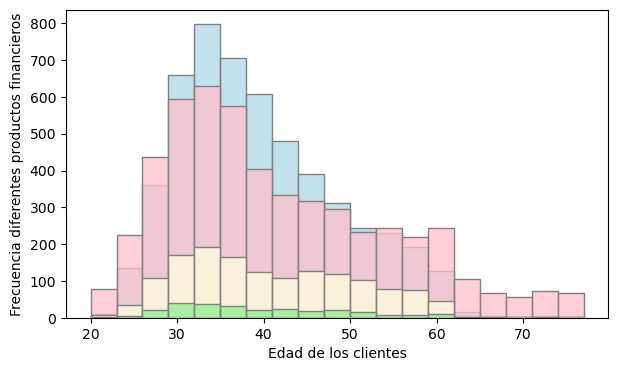

In [332]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
sns.histplot(data=hipoteca, x='age', bins = range(20,80,3), color='lightblue', edgecolor = 'gray', legend = True)
sns.histplot(data=deposito, x='age', bins = range(20,80,3), color='pink', edgecolor = 'gray', legend = True)
sns.histplot(data=credito, x='age', bins = range(20,80,3), color='lightyellow', edgecolor = 'gray', legend = True)
sns.histplot(data=clientes_todo_contratado, x='age', bins = range(20,80,3), color='lightgreen', edgecolor = 'gray', legend = True)
plt.xlabel('Edad de los clientes')
plt.ylabel('Frecuencia diferentes productos financieros')
plt.show()